# ARIMA
##### AR : Autoregressive
##### I : Integrated
##### MA : Moving Average

### The Idea
    Capture autocorelation in the series by modeling it directly

### Advantages
  * Strong underlying theory
  * Flexible

### Key concepts
  * Order
  * Differencing

## Autoregressive

# Assumptions -  Data should be Stationary
Stationary data
![Stationary data](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2016/12/Daily-Female-Births-Dataset-Plot.png)
Non-stationary data
![Non-stationary data](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2016/12/Non-Stationary-Airline-Passengers-Dataset.png)
Stationary means they must have -
   * Constant variance
   * Constant mean
   * Constant autocorrelation
   * No seasonality
   * No trends
![No trend graph](https://qph.fs.quoracdn.net/main-qimg-e3cc2638ee418d4fbbf84ae3b0649d71-c)

<b> If non-stationary, Need to transform before fit to ARIMA</b>

# Check if Data is Stationary
#### Augmented Dickey-Fuller test
* H0 : Not stationary
    * p-value > 0.05: Fail to reject H0
* H1 : Stationary
    * p-value <= 0.05: Reject H0

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [2]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2]

In [3]:
training_set

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04
...,...
1253,790.90
1254,790.68
1255,793.70
1256,783.33


In [4]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [5]:
model=ARIMA(training_set['Open'],order=(1,1,1))
model_fit=model.fit()

In [6]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Open   No. Observations:                 1257
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4458.815
Method:                       css-mle   S.D. of innovations              8.400
Date:                Sat, 23 May 2020   AIC                           8925.630
Time:                        17:06:56   BIC                           8946.175
Sample:                             1   HQIC                          8933.351
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3638      0.231      1.577      0.115      -0.088       0.816
ar.L1.D.Open    -0.3649      0.563     -0.648      0.517      -1.469       0.739
ma.L1.D.Open     0.3292      0.571      0.576      0.564      -0.790       1.448
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.7402           +0.0000j            2.7402            0.5000
MA.1           -3.0378           +0.0000j            3.0378            0.5000
-----------------------------------------------------------------------------
"""

In [7]:
training_set.isnull().sum()

Open    0
dtype: int64

In [8]:
training_set.shape

(1258, 1)

In [9]:
pred = model_fit.predict(start=60,end=1258)

In [10]:
pred

60      0.303880
61      0.371463
62      0.404283
63      0.559038
64      0.229899
          ...   
1254    0.401423
1255    0.372251
1256    0.265999
1257    0.779772
1258    0.260577
Length: 1199, dtype: float64

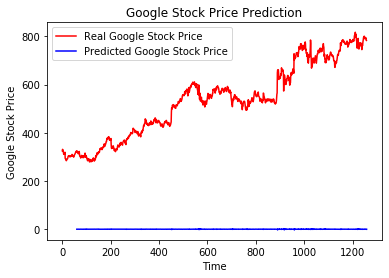

In [11]:
# Visualising the results
plt.plot(training_set, color = 'red', label = 'Real Google Stock Price')
plt.plot(pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [15]:
model=sm.tsa.statespace.SARIMAX(training_set,order=(1, 1, 1),seasonal_order=(1,1,1,24))
results = model.fit()

/home/rasel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/rasel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/rasel/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [17]:
pred = results.predict(start=60,end=1258)

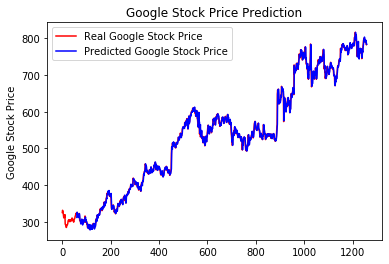

In [18]:
# Visualising the results
plt.plot(training_set, color = 'red', label = 'Real Google Stock Price')
plt.plot(pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [20]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2]

In [22]:
real_stock_price

,Open
0,778.81
1,788.36
2,786.08
3,795.26
4,806.40
5,807.86
6,805.00
7,807.14
8,807.48
9,807.08


In [21]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

NameError: name 'df' is not defined